In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Cargar datos
datos = pd.read_csv('listings (1).csv.gz')
print(f'Dataset original: {datos.shape[0]} registros')

# Procesar columna de precio
datos = datos[datos['price'].notna()]
datos['precio_limpio'] = datos['price'].str.replace('$', '', regex=False)
datos['precio_limpio'] = datos['precio_limpio'].str.replace(',', '', regex=False)
datos['precio_limpio'] = pd.to_numeric(datos['precio_limpio'], errors='coerce')

# Filtrar datos válidos
datos_validos = datos[(datos['precio_limpio'] >= 10) & (datos['precio_limpio'] <= 500)]
print(f'Datos después de limpieza: {len(datos_validos)} registros')

# Estadísticas descriptivas
precio_promedio = datos_validos['precio_limpio'].mean()
precio_minimo = datos_validos['precio_limpio'].min()
precio_maximo = datos_validos['precio_limpio'].max()

print(f'\nEstadísticas de precios:')
print(f'Precio promedio: ${precio_promedio:.2f}')
print(f'Precio mínimo: ${precio_minimo:.2f}')
print(f'Precio máximo: ${precio_maximo:.2f}')


Dataset original: 26067 registros
Datos después de limpieza: 3713 registros

Estadísticas de precios:
Precio promedio: $375.03
Precio mínimo: $116.00
Precio máximo: $500.00


/var/folders/2m/m9kcb1_j06v8b_0fs94v_8fh0000gn/T/ipykernel_89923/1182969046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_validos['categoria_precio'] = datos_validos['precio_limpio'].apply(categorizar_precio)


Distribución por categorías de precio:
Premium: 3706 (99.8%)
Medio: 7 (0.2%)


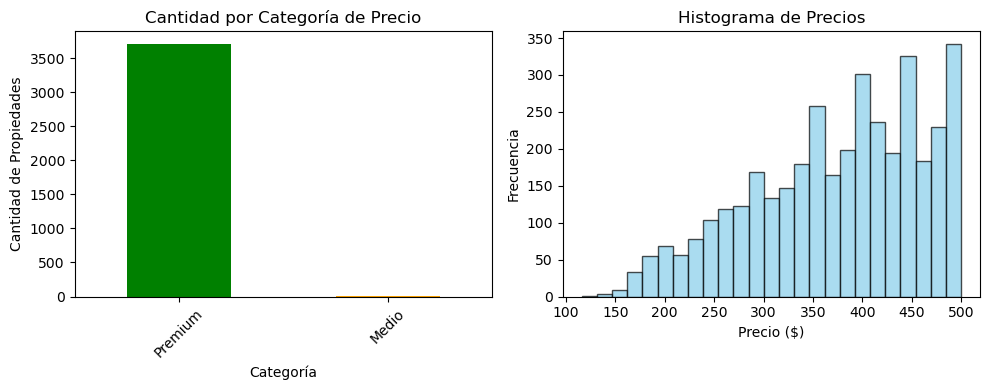

In [2]:
# Análisis por categorías de precio
# Categorizar precios en rangos
def categorizar_precio(precio):
    if precio < 50:
        return 'Económico'
    elif precio < 150:
        return 'Medio'
    else:
        return 'Premium'

datos_validos['categoria_precio'] = datos_validos['precio_limpio'].apply(categorizar_precio)

# Contar por categorías
conteo_categorias = datos_validos['categoria_precio'].value_counts()
print("Distribución por categorías de precio:")
for categoria, cantidad in conteo_categorias.items():
    porcentaje = (cantidad / len(datos_validos)) * 100
    print(f"{categoria}: {cantidad} ({porcentaje:.1f}%)")

# Visualización de categorías
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
conteo_categorias.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Cantidad por Categoría de Precio')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Propiedades')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.hist(datos_validos['precio_limpio'], bins=25, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histograma de Precios')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Variables encontradas para el modelo: ['bedrooms', 'bathrooms', 'accommodates']
Datos para modelo: 3677 registros

Modelo de regresión múltiple:
Error absoluto medio: $69.31
Intercepto: $368.57

Coeficientes por variable:
- bedrooms: $-1.78
- bathrooms: $-10.93
- accommodates: $13.23


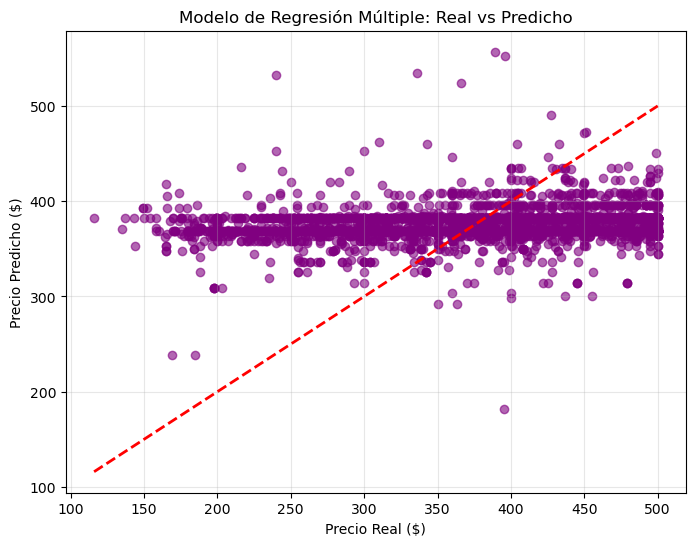

In [3]:
# Modelo predictivo usando múltiples variables
# Identificar variables numéricas disponibles
variables_interes = ['bedrooms', 'bathrooms', 'accommodates']
variables_disponibles = []

for var in variables_interes:
    if var in datos_validos.columns:
        variables_disponibles.append(var)

print(f"Variables encontradas para el modelo: {variables_disponibles}")

if len(variables_disponibles) >= 2:
    # Preparar datos para modelo múltiple
    datos_modelo = datos_validos[variables_disponibles + ['precio_limpio']].copy()
    datos_modelo = datos_modelo.dropna()
    
    # Convertir a numérico
    for var in variables_disponibles:
        datos_modelo[var] = pd.to_numeric(datos_modelo[var], errors='coerce')
    
    datos_modelo = datos_modelo.dropna()
    
    print(f"Datos para modelo: {len(datos_modelo)} registros")
    
    # Crear modelo con múltiples variables
    X_multiple = datos_modelo[variables_disponibles]
    y_multiple = datos_modelo['precio_limpio']
    
    modelo_multiple = LinearRegression()
    modelo_multiple.fit(X_multiple, y_multiple)
    
    predicciones_multiple = modelo_multiple.predict(X_multiple)
    mae = mean_absolute_error(y_multiple, predicciones_multiple)
    
    print(f"\nModelo de regresión múltiple:")
    print(f"Error absoluto medio: ${mae:.2f}")
    print(f"Intercepto: ${modelo_multiple.intercept_:.2f}")
    
    print(f"\nCoeficientes por variable:")
    for var, coef in zip(variables_disponibles, modelo_multiple.coef_):
        print(f"- {var}: ${coef:.2f}")
        
    # Gráfico de predicciones vs reales
    plt.figure(figsize=(8, 6))
    plt.scatter(y_multiple, predicciones_multiple, alpha=0.6, color='purple')
    plt.plot([y_multiple.min(), y_multiple.max()], [y_multiple.min(), y_multiple.max()], 'r--', linewidth=2)
    plt.xlabel('Precio Real ($)')
    plt.ylabel('Precio Predicho ($)')
    plt.title('Modelo de Regresión Múltiple: Real vs Predicho')
    plt.grid(True, alpha=0.3)
    plt.show()
    
else:
    print("No hay suficientes variables para modelo múltiple")


=== ANÁLISIS FINAL ===
1. Se analizaron 3713 propiedades de Airbnb
2. El precio promedio es de $375.03
3. La categoría 'Premium' representa el 99.8% del mercado
4. La variable 'accommodates' tiene el mayor impacto en el precio
   (coeficiente: $13.23)
5. El modelo predice precios con un error promedio de $69.31

Promedios por categoría:
- Medio: $139.00
- Premium: $375.47


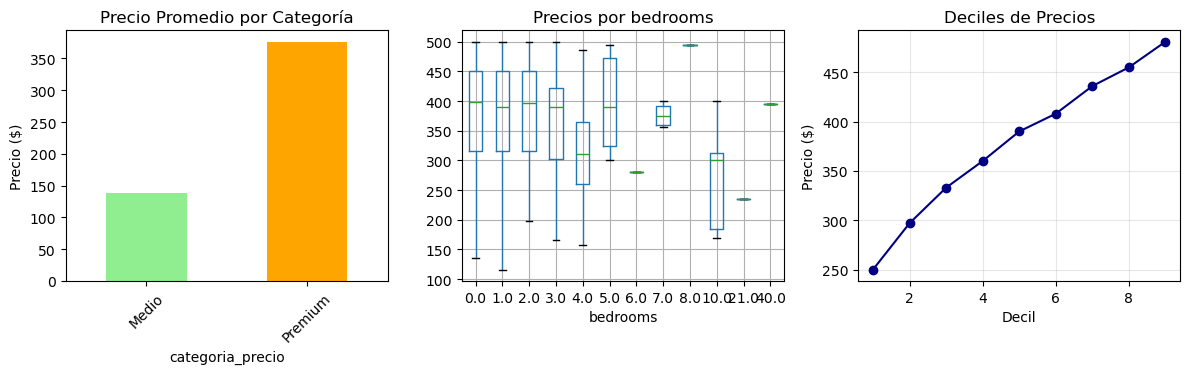

In [4]:
# Análisis final y recomendaciones
print("=== ANÁLISIS FINAL ===")

# Resumen de hallazgos
print(f"1. Se analizaron {len(datos_validos)} propiedades de Airbnb")
print(f"2. El precio promedio es de ${precio_promedio:.2f}")

# Análisis por categorías
categoria_mas_comun = conteo_categorias.index[0]
porcentaje_mas_comun = (conteo_categorias.iloc[0] / len(datos_validos)) * 100
print(f"3. La categoría '{categoria_mas_comun}' representa el {porcentaje_mas_comun:.1f}% del mercado")

# Insights del modelo
if 'modelo_multiple' in locals():
    variable_mas_importante = variables_disponibles[np.argmax(np.abs(modelo_multiple.coef_))]
    coef_mas_importante = modelo_multiple.coef_[np.argmax(np.abs(modelo_multiple.coef_))]
    
    print(f"4. La variable '{variable_mas_importante}' tiene el mayor impacto en el precio")
    print(f"   (coeficiente: ${coef_mas_importante:.2f})")
    
    print(f"5. El modelo predice precios con un error promedio de ${mae:.2f}")

# Comparación con promedios por categoría
print(f"\nPromedios por categoría:")
promedios_categoria = datos_validos.groupby('categoria_precio')['precio_limpio'].mean()
for categoria, promedio in promedios_categoria.items():
    print(f"- {categoria}: ${promedio:.2f}")

# Gráfico final de resumen
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
promedios_categoria.plot(kind='bar', color=['lightgreen', 'orange', 'lightcoral'])
plt.title('Precio Promedio por Categoría')
plt.ylabel('Precio ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
if 'variables_disponibles' in locals() and len(variables_disponibles) > 0:
    datos_validos.boxplot(column='precio_limpio', by=variables_disponibles[0] if variables_disponibles[0] in datos_validos.columns else None, ax=plt.gca())
    plt.title(f'Precios por {variables_disponibles[0] if variables_disponibles else "Variable"}')
    plt.suptitle('')

plt.subplot(1, 3, 3)
# Distribución de precios por deciles
deciles = np.percentile(datos_validos['precio_limpio'], [10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.plot(range(1, 10), deciles, 'o-', color='navy')
plt.title('Deciles de Precios')
plt.xlabel('Decil')
plt.ylabel('Precio ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
